In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Results_21Mar2022_modified.csv") 

In [20]:
df

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,492,female,fish,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie_male_30-39,6.615301,11.385959,13374.38105,18.283800,1.769398,0.482313,641.918305,560.925069,21.075983,1221,male,veggie,30-39
71996,1000,veggie_male_40-49,6.185949,10.566347,12959.68443,17.342092,1.605406,0.446074,580.913591,527.860144,20.225756,961,male,veggie,40-49
71997,1000,veggie_male_50-59,5.871454,9.806539,11924.19092,16.625511,1.468003,0.431966,533.784777,487.176818,19.625305,426,male,veggie,50-59
71998,1000,veggie_male_60-69,5.922496,9.873027,11310.87733,16.531075,1.492114,0.437879,545.453273,487.030916,19.936478,229,male,veggie,60-69


In [21]:
df['Greenhouse gas categories'] = df[['mean_ghgs', 'mean_ghgs_ch4', 'mean_ghgs_n2o']].sum(axis=1)
df['Natural environment categories'] = df[['mean_land', 'mean_bio', 'mean_eut']].sum(axis=1)
df['Water resources category'] = df[['mean_watscar', 'mean_watuse', 'mean_acid']].sum(axis=1)


In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, group in enumerate(diet_groups):
    group_df = df[df['diet_group'] == group]
    diet_group_counts = group_df['n_participants'].sum()
    cols_of_interest = ['Natural environment categories','Greenhouse gas categories',  'Water resources category']
    group_corr_df = group_df[['n_participants'] + cols_of_interest]
    corr_matrix = group_corr_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'{group} ')
plt.suptitle('Correlation between the number of diet groups of people and environmental factors \n (Less than 0: Negative correlation, Greater than 0: Positive correlation)', fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig('correlation_heatmaps2.png')
plt.close()

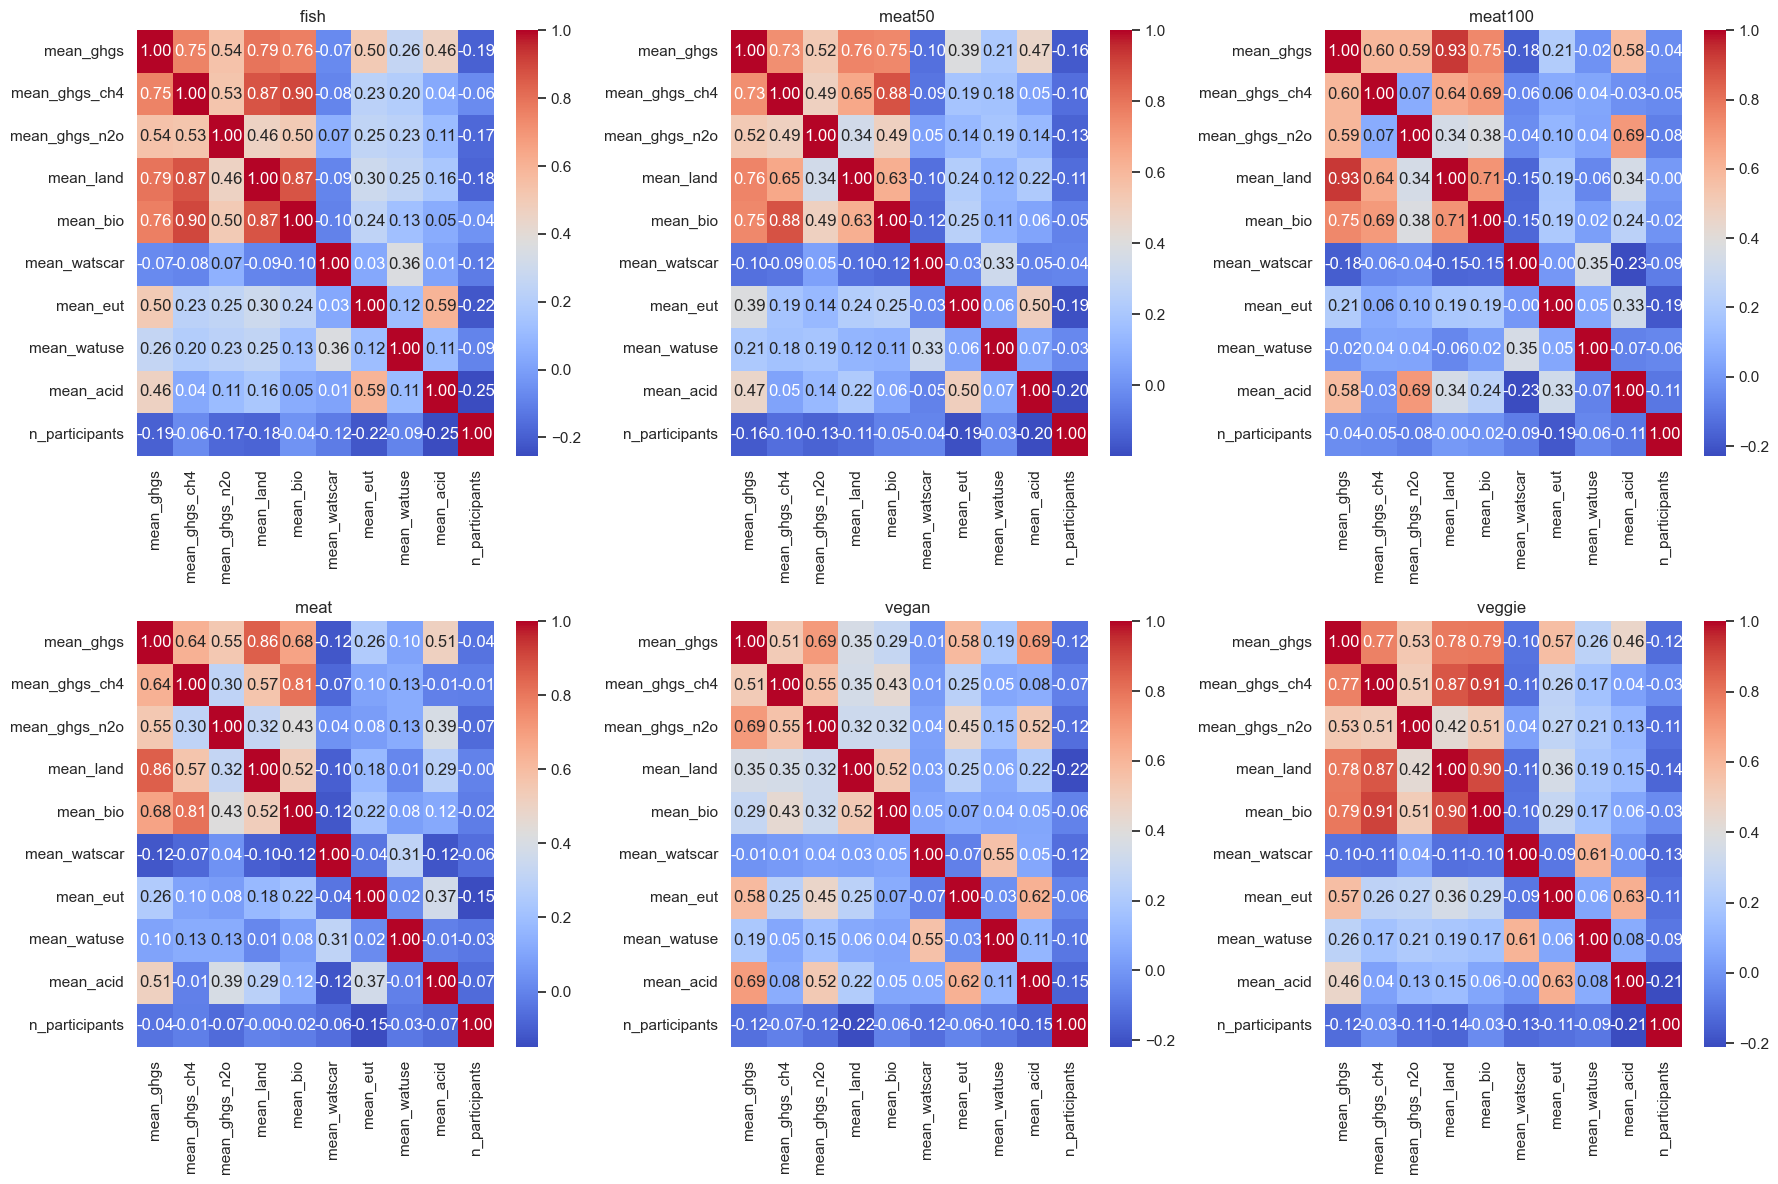

In [56]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, group in enumerate(diet_groups):
    group_df = df[df['diet_group'] == group]
    diet_group_counts = group_df['n_participants'].sum()
    cols_of_interest = ['mean_ghgs','mean_ghgs_ch4','mean_ghgs_n2o','mean_land','mean_bio','mean_watscar','mean_eut','mean_watuse','mean_acid']
    group_corr_df = group_df[cols_of_interest + ['n_participants']]
    corr_matrix = group_corr_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'{group} ')

plt.tight_layout()
plt.savefig('correlation_heatmaps1.png')
plt.show()